<a href="https://colab.research.google.com/github/Iscrisful36/Python-NLP-Fundamentals/blob/main/Grupo12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

Aqui importamos todas las librerías necesarias para poder ejecutar el código sin errores, también para poder realizar todas las funciones de graficado de estadísticas.

In [15]:
# Use pandas to import tweets
tweets_path = '/content/airline_tweets.csv'
tweets = pd.read_csv(tweets_path, sep=',')

Importamos el data_set, ésto representa nuestro alamcén de datos sobre los cuales vamos a trabajar y realizar el tratamiento.

# Nueva sección

In [17]:
pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=18fcc70fb0b13eb2736b471b62022bf4f8a0ff3bffa55a2cc1b5316c4017894b
  Stored in directory: /root/.cache/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils


Esta seccion se añadio para poder solventar el error de importacion de la libreria utils, esta parte es nueva y no forma parte del codigo.

In [24]:
from utils import placeholder

ImportError: cannot import name 'placeholder' from 'utils' (/usr/local/lib/python3.11/dist-packages/utils/__init__.py)

Aqui dio error porque no permitio incluir la libreria instalada, era necesario para poder continuar yaa que el metodo placeholder hace uso de la libreria utils

In [19]:
blankspace_pattern = r'\s+'
blankspace_repl = ' '

def preprocess(text):
    '''Create a preprocess pipeline that cleans the tweet data.'''

    # Step 1: Lowercase
    text = text.lower()

    # Step 2: Replace patterns with placeholders
    text = placeholder(text)

    # Step 3: Remove extra whitespace characters
    text = re.sub(blankspace_pattern, blankspace_repl, text)
    text = text.strip()

    return text

Aqui estamos creando una función llamada preproccess, que haga los siguientes pasos al introduccir un nuevo texto                                          Paso 1: Convierte el texto en minúsculas.
Paso 2: Reemplaza los siguientes patrones con marcadores de posición:
URL → URL
Dígitos → DÍGITO
Hashtags → HASHTAG
Identificadores de tweets → USUARIO
Paso 3: Elimina los espacios en blanco adicionales.
 A continuación nos dan unas sugerencias para poder guiarnos en el reto y poder aprovechar cada paso:
 Como manejo de caracteres, li mpieza de datos y nos provee una función para poder usarla y manejarka en todo el notebook

In [20]:
example_tweet = 'lol @justinbeiber and @BillGates are like soo 2000 #yesterday #amiright saw it on https://twitter.com #yolo'

Este es una data de ejemplo de un tweet que fuéposteado

In [25]:
# Apply the function to the example tweet
print(example_tweet)
print(f"{'='*50}")
print(preprocess(example_tweet))

lol @justinbeiber and @BillGates are like soo 2000 #yesterday #amiright saw it on https://twitter.com #yolo
lol @justinbeiber and @billgates are like soo 2000 #yesterday #amiright saw it on https://twitter.com #yolo


In [26]:
# Apply the function to the text column and assign the preprocessed tweets to a new column
tweets['text_processed'] = tweets['text'].apply(lambda x: preprocess(x))
tweets['text_processed'].head()

,text_processed
0,@virginamerica what @dhepburn said.
1,@virginamerica plus you've added commercials t...
2,@virginamerica i didn't today... must mean i n...
3,@virginamerica it's really aggressive to blast...
4,@virginamerica and it's a really big bad thing...


Aqui se va a realizar el reto dos que consiste en lematizar el texto para hacerlo màs legiblew, esto nos ayuda a poder generar datos de entrenamiento más precisos y fiables.
En el reto anterior se usó spaCY para lematizar el codigo, en la seccion anterior de lematizó el texto para poder obtener la forma base de la palabra, es decir la frase sin aplciar formato y estilos de presentación, obtenerla lo mas simple y base posible, ahora en esta seccion lo que se va a hcaer es aplicar la lematización para poder hacer el texto más legible y con el disminuir el numero de palbras usadas, esto puede ayudarnos a realizar de forma mas efectiva un modelo de clasificacion de sentimientos porque al usar menos palabras es más eficiente. Esto lo vamos a aplicar a todos los tweets que tenemos cargados anteriormente en nuestro dataset.
Lo que vamos a hacer es mediante una lista iterar o recorrer sobre cada elemento y obtener de cada uno de ellos su token o identificador unico, algo como un ID propio

In [27]:
# Import spaCy
import spacy
nlp = spacy.load('en_core_web_sm')

In [28]:
# Create a function to lemmatize text
def lemmatize_text(text):
    '''Lemmatize the text input with spaCy annotations.'''

    # Step 1: Initialize an empty list to hold lemmas
    lemma = []

    # Step 2: Apply the nlp pipeline to input text
    doc = nlp(text)

    # Step 3: Iterate over tokens in the text to get the token lemma
    for token in doc:
        lemma.append(token.lemma_)

    # Step 4: Join lemmas together into a single string
    text_lemma = ' '.join(lemma)

    return text_lemma

In [29]:
# Apply the function to an example tweet
print(tweets.iloc[101]["text_processed"])
print(f"{'='*50}")
print(lemmatize_text(tweets.iloc[101]['text_processed']))

@virginamerica why must a traveler miss a flight to late flight check a bag? i missed my morning appointments and you lost my business. #sfo2lax
@virginamerica why must a traveler miss a flight to late flight check a bag ? I miss my morning appointment and you lose my business . # sfo2lax


In [30]:
# This may take a while!
tweets['text_lemmatized'] = tweets['text_processed'].apply(lambda x: lemmatize_text(x))

In [31]:
# Print the preprocessed tweet
print(tweets['text_processed'].iloc[101])
print(f"{'='*50}")
# Print the lemmatized tweet
print(tweets['text_lemmatized'].iloc[101])

@virginamerica why must a traveler miss a flight to late flight check a bag? i missed my morning appointments and you lost my business. #sfo2lax
@virginamerica why must a traveler miss a flight to late flight check a bag ? I miss my morning appointment and you lose my business . # sfo2lax


Aquí inicamos la tercera secccion, que corresponde al tercer reto:

Debemos obtener los valores tf-idf de cada termino del documento, es decir de nuestro dataset de tweets que lo cargamos anteriormente y si algunos de esos valores nos dicen algo referente a los sentimientos, osea, si hablan o se describe un sentimiento por ejemplo: ira, alegri,etc.
También debemos hacernos la pregunta si alguna de esas palkabras o valores describen algo malo o bueno; que nos pueda ayudar a distinguir tweets positivos o negativos.
Entonces, lo que vamos a hacer es mediante estos valores definir un clasificador o score de tf-idf.
Ahora mediante un dataset vamos a crear un conjunto de indices que por cada tf-idf recueperado asigne un valor positivo o negativo, luego vamos a organizar cada uno de esos valores en un subconjunto, los mismos que los vamos a ordenar de forma ascendente y vamos a obtener los 10 primeros de cada subconjunto para poder construir nuestro grafico de clasificacion de sentimientos

In [32]:
# Create a tfidf vectorizer
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             min_df=2,
                             max_df=0.95,
                             max_features=None)

# Fit and transform
tf_dtm = vectorizer.fit_transform(tweets['text_lemmatized'])

# Create a tf-idf dataframe
tfidf = pd.DataFrame(tf_dtm.todense(),
                     columns=vectorizer.get_feature_names_out(),
                     index=tweets.index)

In [33]:
# Complete the boolean masks
positive_index = tweets[tweets['airline_sentiment'] == 'positive'].index
negative_index = tweets[tweets['airline_sentiment'] == 'negative'].index

In [34]:
# Complete the following two lines
pos = tfidf.loc[positive_index].mean().sort_values(ascending=False).head(10)
neg = tfidf.loc[negative_index].mean().sort_values(ascending=False).head(10)

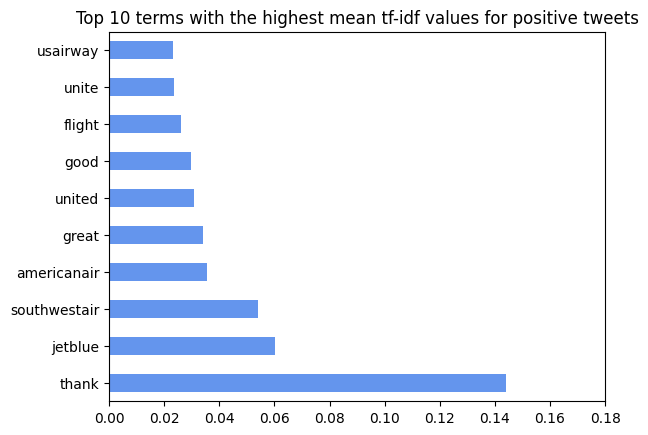

In [35]:
pos.plot(kind='barh',
         xlim=(0, 0.18),
         color='cornflowerblue',
         title='Top 10 terms with the highest mean tf-idf values for positive tweets');

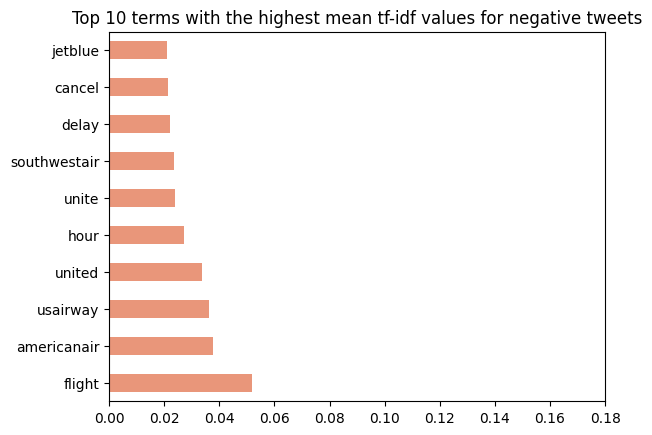

In [36]:
neg.plot(kind='barh',
         xlim=(0, 0.18),
         color='darksalmon',
         title='Top 10 terms with the highest mean tf-idf values for negative tweets');

In [39]:
# Use pandas to import tweets
tweets_path = '/content/airline_tweets.csv'
try:
    tweets = pd.read_csv(tweets_path, sep=',')
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {tweets_path}. Please ensure the file exists in the specified location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

File loaded successfully!


In [23]:
def placeholder(text):
    '''Placeholder function to be replaced with actual preprocessing steps later.'''
    # This is a placeholder function.
    # You would replace this with code to handle specific patterns,
    # like replacing mentions, hashtags, URLs, etc.
    # For now, it just returns the text as is.
    return text